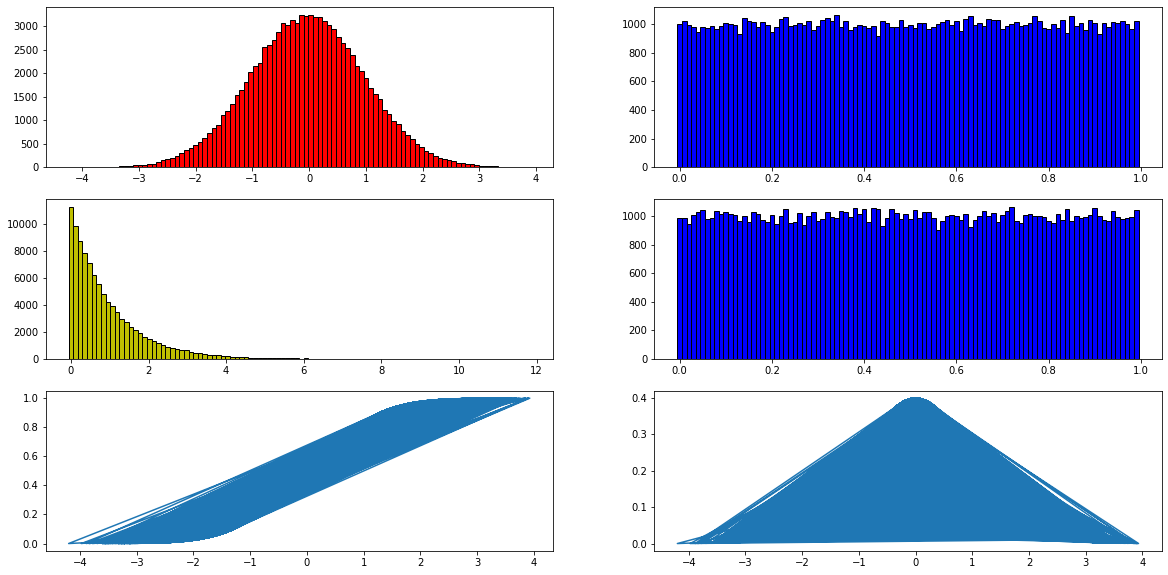

In [8]:
# %matplotlib inline
# probability integral transform
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import expon

x = np.random.randn(100000)
z = np.random.exponential(1,100000)
k = np.random.uniform(-3,3,100000)
y = norm.cdf(x)
a = norm.pdf(x)
w = expon.cdf(z)

fig, axs = plt.subplots(3, 2,figsize=(20, 10))
axs[0,0].hist(x, 100,align='left', color='r', edgecolor='black',
              linewidth=1)
axs[0,1].hist(y, 100,align='left', color='b', edgecolor='black',
              linewidth=1)
axs[1,0].hist(z, 100,align='left', color='y', edgecolor='black',
              linewidth=1)
axs[1,1].hist(w, 100,align='left', color='b', edgecolor='black',
              linewidth=1)
axs[2,0].plot(x,y)
axs[2,1].plot(x,a)
plt.show()


In [3]:
# %matplotlib inline
#MSE & MAE
import numpy as np
import math

x = np.random.rand(1000)
msd1 = sum((x - np.average(x))**2)/1000
msd2 = sum((x - np.median(x))**2)/1000
mad1 = sum(abs(x - np.median(x)))/1000
mad2 = sum(abs(x - np.average(x)))/1000

print(msd1,msd2,mad1,mad2)

0.08490450249054347 0.08490541640157603 0.25123284260709766 0.25123444816059703


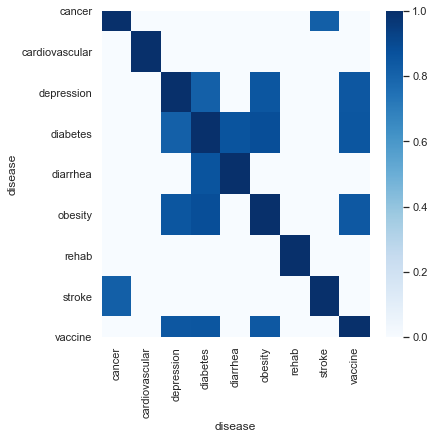

In [72]:
import pandas as pd
import seaborn as sns; 
import matplotlib.pyplot as plt

df = pd.read_csv('RegionalInterestByConditionOverTime.csv','\t')
average = df.mean(axis =0)
average.rename(lambda x : "".join( letter for letter in x if letter.isalpha()), inplace = True)
average.drop('geoCode',inplace = True)
avg_frame = average.to_frame()
avg_frame.index.name = 'disease'
avg_frame.columns = ['count']
avg_frame = avg_frame.reset_index().melt('disease', var_name='count')
avg_frame['count'] = 2004 + avg_frame.groupby('disease').cumcount()
avg_frame = avg_frame.pivot('disease','count').droplevel(0,1)
avg_frame = avg_frame.T
corr = avg_frame.corr()
m = corr > 0.8
k = corr.where(m ,0)
fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim(-2, 2)
ax = sns.heatmap(k,cmap="Blues")
ax

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; 
import matplotlib.pyplot as plt

df = pd.read_csv('RegionalInterestByConditionOverTime.csv','\t')
df.drop('geoCode',axis = 1 ,inplace = True)
df.set_index('dma', inplace = True)
df.columns = pd.MultiIndex.from_tuples([(col[5:], int(col[0:4])) for col in df.columns], names=['Disease', 'Year'])
df1 = df['cancer'].T
test = df1.head(0).T
set1 = set(df.columns.get_level_values(0))
list1 = list(set1)
list1.sort()
i = 0
for value in list1:
    df1 = df[value].T
    slopes = df1.apply(lambda x: np.polyfit(df1.index, x, 1)[0])
    test.insert(i,value ,slopes)
    i+=1
for column in test.columns:
    print(column, test[column].idxmax(),test[column].max(axis =0))
print ('---------------------------------------------------------------')
for index in test.index:
    print( index,test.loc[index].idxmax(), test.loc[index].max(axis =0))


cancer Jackson TN 2.8373626373625536
cardiovascular Montgomery (Selma) AL 6.461538461538243
depression Presque Isle ME 6.369230769230385
diabetes Jackson TN 5.8791208791206495
diarrhea Alpena MI 9.38901098901071
obesity Gainesville FL 5.485714285714072
rehab Little Rock-Pine Bluff AR 5.285714285714175
stroke Presque Isle ME 5.076923076922929
vaccine Helena MT 5.758241758241672
---------------------------------------------------------------
Portland-Auburn ME depression 4.389010989010731
New York NY diabetes 3.795604395604229
Binghamton NY diarrhea 4.51428571428561
Macon GA diabetes 3.8307692307690675
Philadelphia PA diarrhea 4.076923076922986
Detroit MI diarrhea 4.307692307692193
Boston MA-Manchester NH depression 3.760439560439337
Savannah GA diarrhea 4.523076923076804
Pittsburgh PA diarrhea 4.9846153846152506
Ft. Wayne IN diarrhea 4.6329670329669055
Cleveland-Akron (Canton) OH diarrhea 4.5824175824174604
Washington DC (Hagerstown MD) diarrhea 3.4417582417581456
Baltimore MD diabetes 

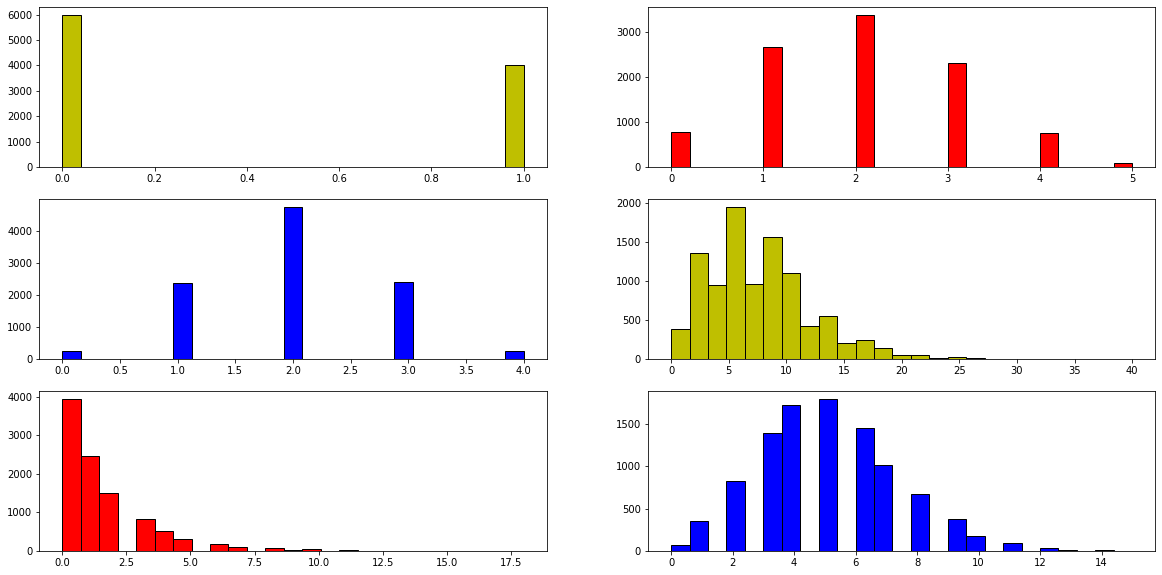

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2,figsize=(20,10))
a1 = np.random.binomial(1,0.4,10000)
a2 = np.random.binomial(5,0.4,10000)
a3 = np.random.hypergeometric(4,6,5,10000)
a4 = np.random.negative_binomial(5,0.4,10000)
a5 = np.random.negative_binomial(1,0.4,10000)
a6 = np.random.poisson(5,10000)

axs[0,0].hist(a1,25, color='y', edgecolor='black')
axs[0,1].hist(a2, 25,color='r', edgecolor='black')
axs[1,0].hist(a3, 25,color='b', edgecolor='black')
axs[1,1].hist(a4, 25,color='y', edgecolor='black')
axs[2,0].hist(a5, 25,color='r', edgecolor='black')
axs[2,1].hist(a6, 25,color='b', edgecolor='black')
plt.show()

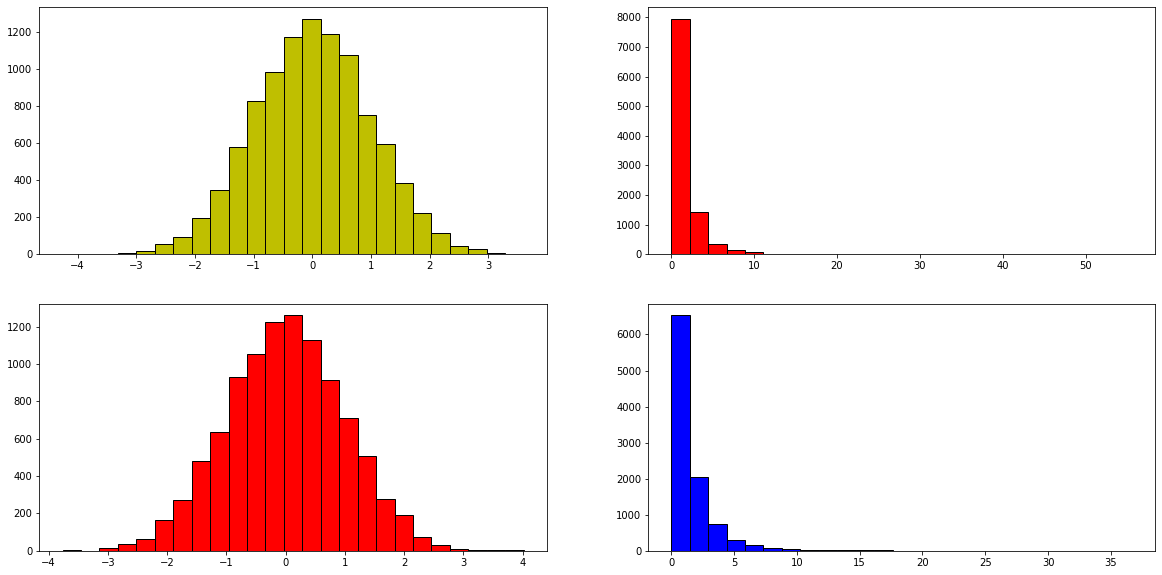

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2,figsize=(20,10))
a1 = np.random.randn(10000)
a2 = np.random.lognormal(0,1,10000)
a3 = np.log(a2)
a4 = np.exp(a1)

axs[0,0].hist(a1,25, color='y', edgecolor='black')
axs[0,1].hist(a2, 25,color='r', edgecolor='black')
axs[1,0].hist(a3, 25,color='r', edgecolor='black')
axs[1,1].hist(a4, 25,color='b', edgecolor='black')
plt.show()

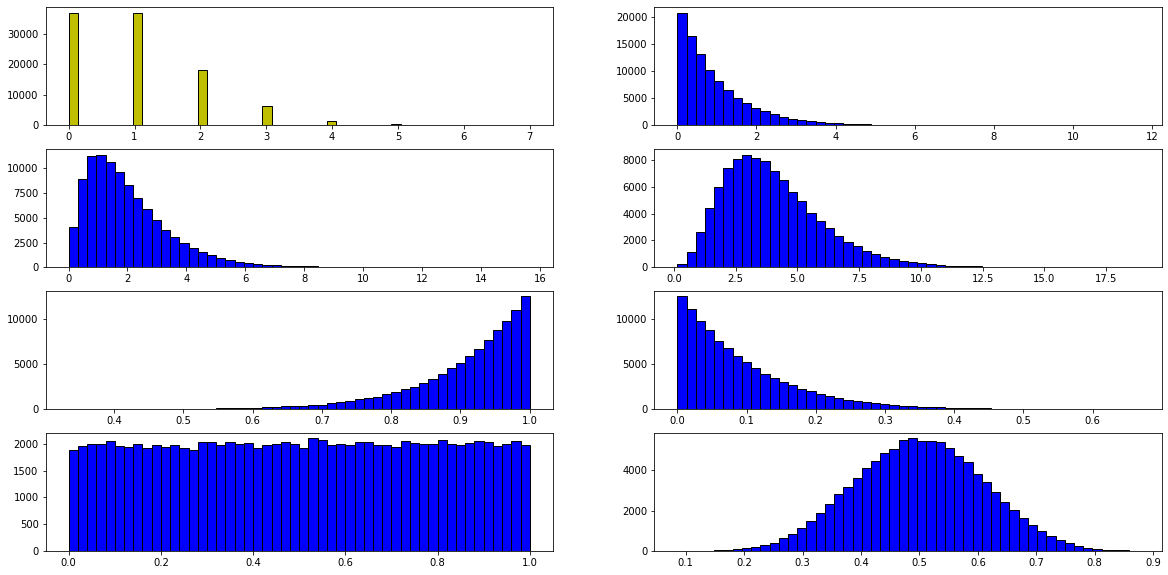

In [20]:
import numpy as np
import matplotlib.pyplot as plt

a7 = np.random.poisson(1,100000)
a8 = np.random.exponential(1,100000)
a9 = np.random.gamma(2,1,100000)
a10 = np.random.gamma(4,1,100000)
a11 = np.random.beta(10 ,1,100000)
a12 = np.random.beta(1 ,10,100000)
a13 = np.random.beta(1 ,1,100000)
a14 = np.random.beta(10 ,10,100000)

fig, axs = plt.subplots(4, 2,figsize=(20,10))
axs[0,0].hist(a7,50, color='y', edgecolor='black')
axs[0,1].hist(a8,50, color='b', edgecolor='black')
axs[1,0].hist(a9,50, color='b', edgecolor='black')
axs[1,1].hist(a10,50, color='b', edgecolor='black')
axs[2,0].hist(a11,50, color='b', edgecolor='black')
axs[2,1].hist(a12,50, color='b', edgecolor='black')
axs[3,0].hist(a13,50, color='b', edgecolor='black')
axs[3,1].hist(a14,50, color='b', edgecolor='black')

plt.show()

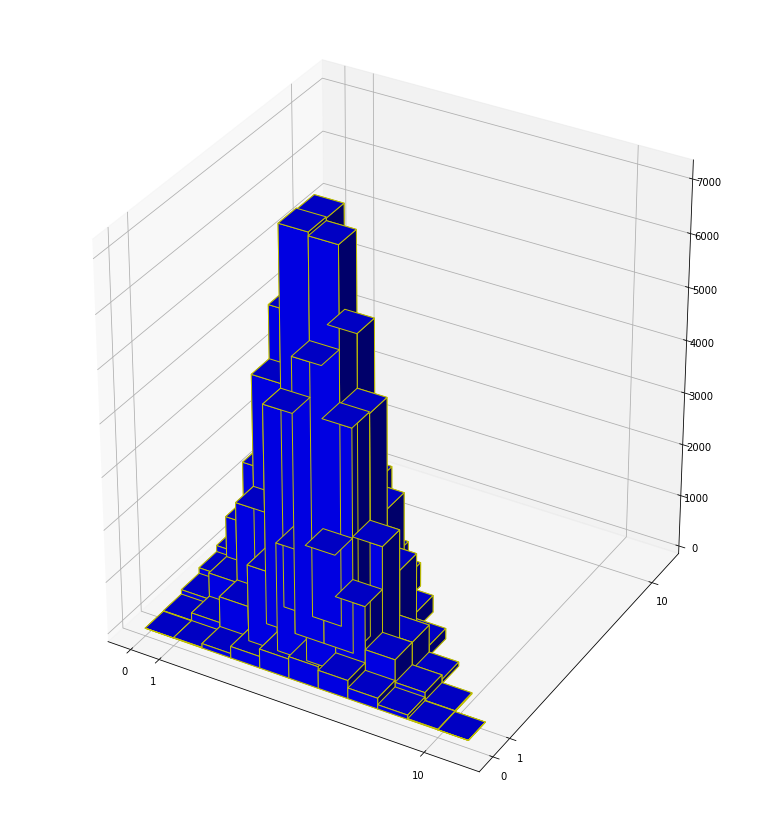

In [127]:
# Multinomial plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

k = np.random.multinomial(10 ,[1/3,1/3,1/3],100000)
m = k[0:100000 ,0:2]
rows = np.unique(m, axis=0,return_counts = True)
unique_rows = rows[0]
row, col = unique_rows.shape
xpos = unique_rows[0:row ,0:1].flatten()
ypos = unique_rows[0:row ,1:2].flatten()
zpos = [0] * row
zsize = np.array(rows[1]).reshape(row,1).flatten()

xsize = np.ones(row)
ysize = np.ones(row)

fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xticks([0, 10, 1])
ax1.set_yticks([0, 10, 1])
ax1.bar3d(xpos, ypos, zpos, xsize, ysize, zsize, color='blue', linewidth=1, edgecolor='y',zsort='average',shade = True)
plt.show()

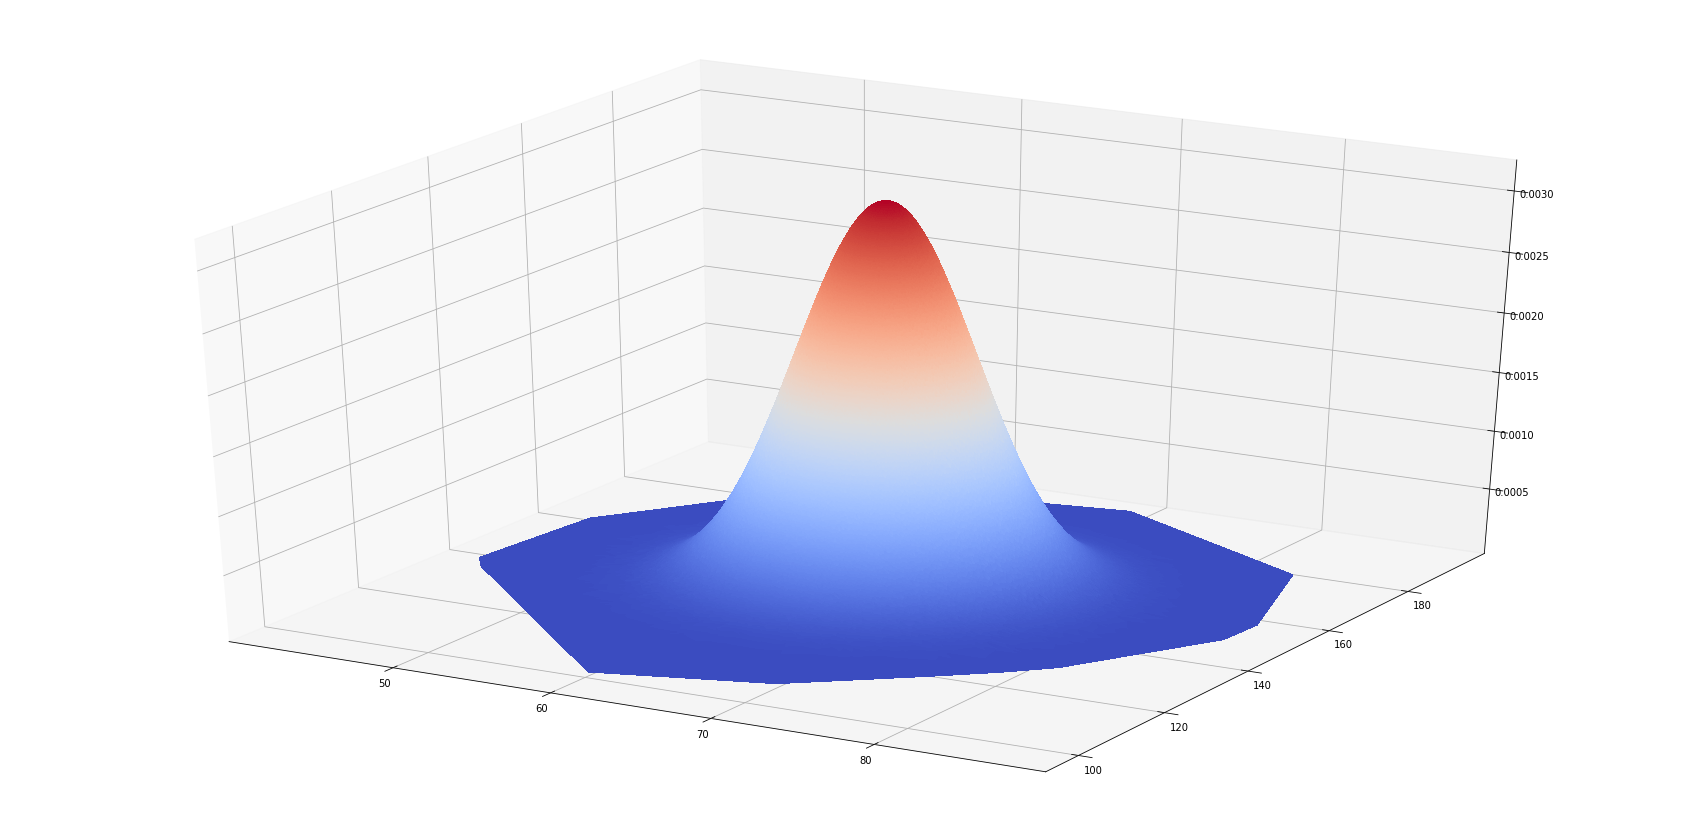

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

np.random.seed(np.random.randint(20))
Z1 = np.random.randn(100000)
np.random.seed(np.random.randint(50))
Z2 = np.random.randn(100000)
AvgX = 65
AvgY = 150
SigX = 5
SigY = 10
rho = 0
coeff = (2*math.pi*(1- rho*rho)**(1/2)*SigX*SigY)**(-1)
X1 = SigX*Z1 + AvgX
X2 = SigY*(rho*Z1 + (1- rho*rho)**(1/2)*Z2) + AvgY
expo = (((X1 - AvgX)**2/(SigX)**2) + ((X2 - AvgY)**2/(SigY)**2) - 
        (2*rho*(X1 - AvgX)*(X2 - AvgY)/(SigX*SigY)))*((-1)/(2*((1- rho*rho)**(1/2))))
val = np.exp(expo)
density = coeff*val

fig = plt.figure(figsize=(30, 15))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X1, X2, density, cmap=cm.coolwarm,
                       antialiased=False)
plt.show()

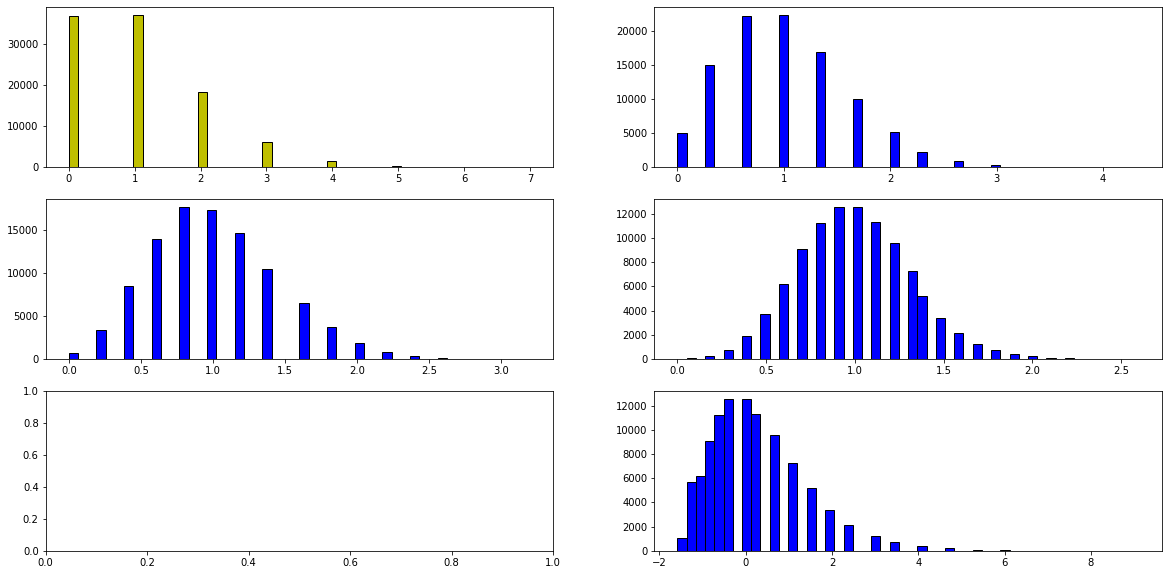

In [14]:
# Delta method example ( a14)
import numpy as np
import matplotlib.pyplot as plt

a1 = np.random.poisson(1,100000)
a2 = np.random.poisson(1,100000)
a3 = np.random.poisson(1,100000)
a4 = np.random.poisson(1,100000)
a5 = np.random.poisson(1,100000)
a6 = np.random.poisson(1,100000)
a7 = np.random.poisson(1,100000)
a8 = np.random.poisson(1,100000)
a9 = np.random.poisson(1,100000)
a10 = np.random.poisson(1,100000)
a11 = (a1 +a2 + a3)/3
a12 = (a1 + a2 + a3 + a4 + a5)/5
a13 = (a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10)/10
a14 = (10**(1/2)/2) * (a13*a13 - 1)
fig, axs = plt.subplots(3,2,figsize=(20,10))

axs[0,0].hist(a1,50, color='y', edgecolor='black')
axs[0,1].hist(a11,50, color='b', edgecolor='black')
axs[1,0].hist(a12,50, color='b', edgecolor='black')
axs[1,1].hist(a13,50, color='b', edgecolor='black')
axs[2,1].hist(a14,50, color='b', edgecolor='black')
plt.show()

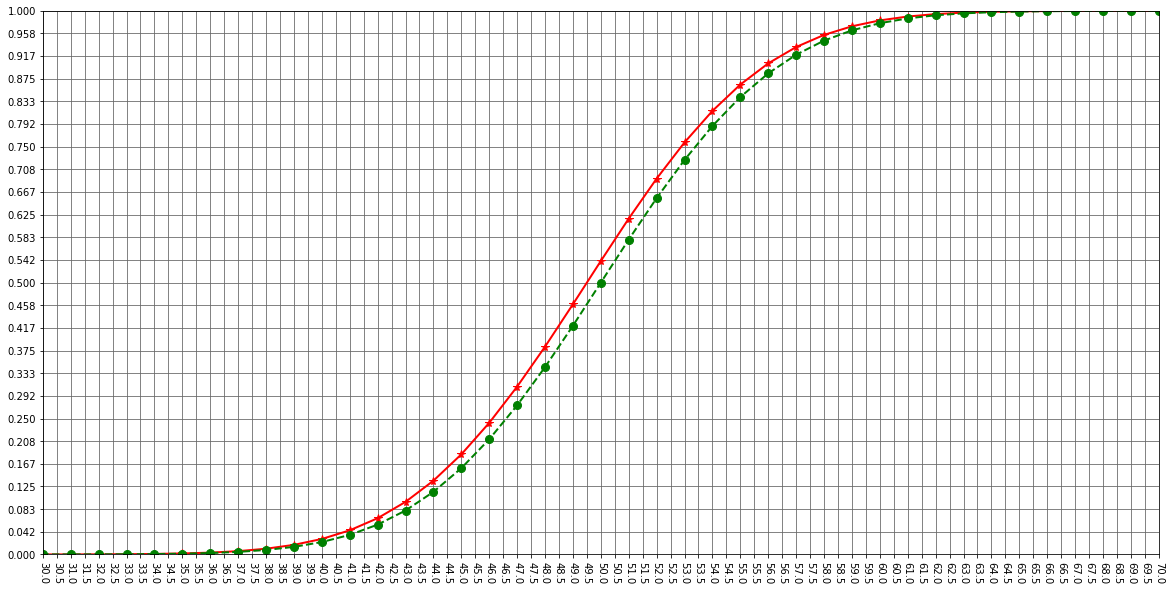

In [34]:
# Correction for continuity
# %matplotlib inline
import numpy as np
import scipy
from scipy.stats import binom,norm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
ax.set_xlim(30,70)
ax.set_ylim(0, 1)
ax.set_xticks(np.linspace(30,70,num = 81))
ax.set_yticks(np.linspace(0,1,25))
plt.xticks(rotation=270)
p = 0.5
n = 100
x = 0
result = []
result1 = []
for a in range(0,121):
    result.append((a,scipy.stats.binom.cdf(x, n, p)))
    result1.append((a,scipy.stats.norm.cdf(x, loc = 50, scale = 5)))
    x+= 1
xy2=zip(*result)
xy3=zip(*result1)
plt.plot(*xy2,color='red', marker='*',linewidth=2, markersize=8)
plt.plot(*xy3,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()


0 0
12 8
21 19
34 26
45 35
57 43
68 52
82 58
91 69
105 75
116 84
127 93
136 104
149 111


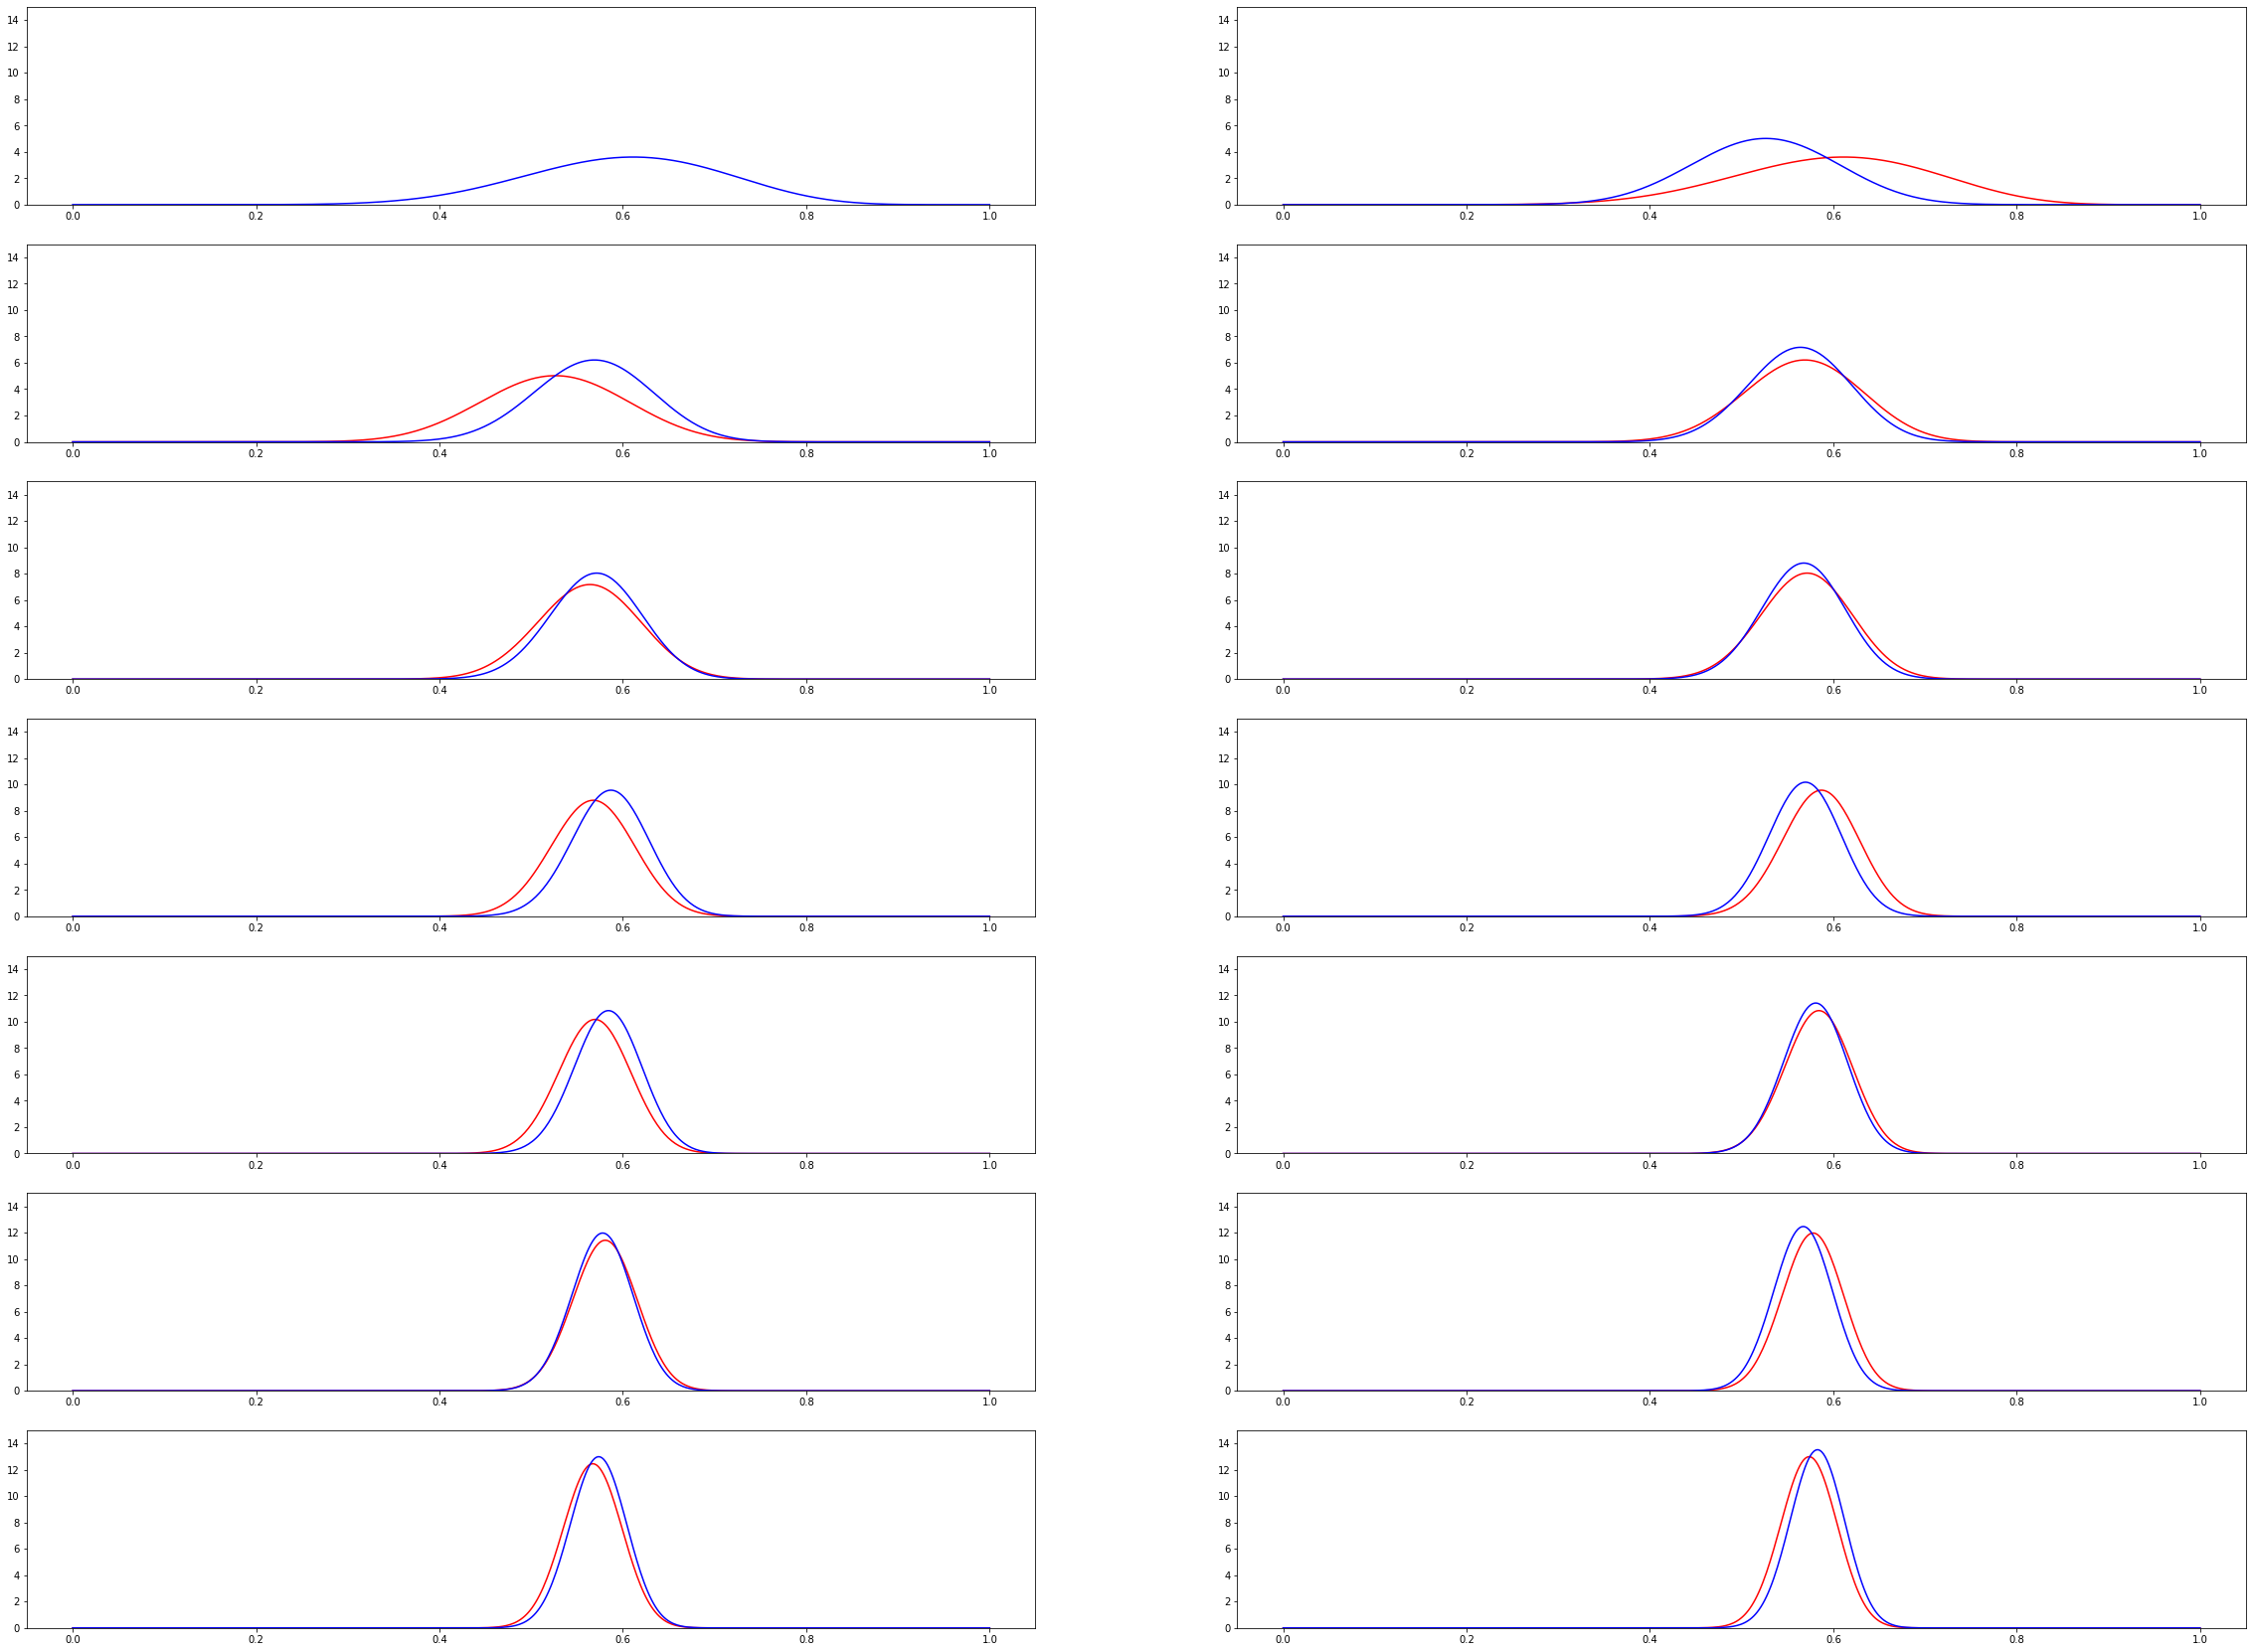

In [7]:
# Bayesian inference of a binomial distribution - n = 100 , p = 0.56 , observing samples of 20 for 6 times.
# We know that n = 100 , and estimating for p.
# Each time we plot the prior & posterior

import scipy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def calc_prior(thetas, a, b):
    return scipy.stats.beta(a, b).pdf(thetas)

def calc_posterior(thetas, a_old, b_old, n, k):
    a_new = a_old+k
    b_new = b_old+n-k
    posterior = scipy.stats.beta(a_new, b_new).pdf(thetas)
    return posterior, a_new, b_new

fig, axs = plt.subplots(7,2,figsize=(40,30))
thetas = np.linspace(0, 1, 500) 
a, b = 0, 0
tup = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1),(5,0),(5,1),(6,0),(6,1)]
for x,y in tup:
    print(a,b)
    k = sum(np.random.binomial(size=20, n=1, p= 0.6))
    prior = calc_prior(thetas, a, b)
    axs[x,y].set_ylim(0, 15)
    axs[x,y].plot(thetas, prior, label="Prior", c="red")
    posterior, a, b = calc_posterior(thetas, a, b, 20, k) 
    axs[x,y].plot(thetas, posterior, label="Posterior", c="blue")
    


In [63]:
# EM algorithm for missing data _ but doesn't converge

import numpy as np

def start_estimate():
    avg1,avg2 = np.nanmean(start_data , axis = 0)
    std1 ,std2 = np.nanstd(start_data,axis =0)
    corr = np.corrcoef(start_data[0:3,0:1],start_data[0:3,1:2],rowvar = False)[0,1]
    return (avg1,avg2,std1,std2,corr)

def iter_estimate(k,var_x,var_y):
    avg1,avg2 = np.nanmean(k , axis = 0)
    sum1,sum2 = np.nanvar(k,axis =0)
    prod1, prod2 = np.nanvar(k,axis =0)*6
    rho = np.sum((iter_data[:,0] - avg1)*(iter_data[:,1] - avg2))/((prod1 +var_x)**(1/2)*(prod2 + var_y)**(1/2))
    return (avg1 , avg2, (sum1 + var_x/6)**(1/2), (sum2 + var_y/6)**(1/2),rho)

def cond_mean_var_wt(ht,estimate):
    avg1,avg2,std1,std2,rho = estimate
    cond_mean_wt = avg2 + rho*std2/std1*(ht-avg1)
    cond_var_wt = (1 - rho*rho)*std2*std2
    return (cond_mean_wt, cond_var_wt)

def cond_mean_var_ht(wt,estimate):
    avg1,avg2,std1,std2,rho = estimate
    cond_mean_ht = avg1 + rho*std1/std2*(wt-avg2)
    cond_var_ht = (1 - rho*rho)*std1*std1
    return (cond_mean_ht , cond_var_ht)

#def log_likelihood(array):
    #avg1,avg2,std1,std2,rho = estimate()
    
    
start_data = np.empty([6, 2])
start_data[:] = np.NaN
start_data[0:3,] = [[72,197],[70,204],[73,208]]
start_data[3,0] = 68
start_data[4,0] = 65
start_data[5,1] = 170

iter_data = []
estimate0 = start_estimate()
var_delta_x = 0
var_delta_y = 0

for row in start_data:
    x, y = row
    if np.isnan(x):
        x = cond_mean_var_ht(y,estimate0)[0]
        var_delta_x = var_delta_x + cond_mean_var_ht(y,estimate0)[1]
    elif np.isnan(y):
        y = cond_mean_var_wt(x,estimate0)[0]
        var_delta_y = var_delta_y + cond_mean_var_wt(x,estimate0)[1]
    row = x,y
    iter_data.append(row)
iter_data = np.array(iter_data)
estimate1 = iter_estimate(iter_data,var_delta_x,var_delta_y)

var_delta_x2 = 0
var_delta_y2 = 0
estimate_new = estimate1
estimate_old = (0,0,0,0,0)
counter = 0
while(counter <35):
    iter_new = []
    for row in zip(start_data,iter_data):
        x,y = row
        x1,y1 = x
        x2,y2 = y
        if np.isnan(x1):
            x2 = cond_mean_var_ht(y2,estimate_new)[0]
            var_delta_x2 = var_delta_x2 + cond_mean_var_ht(y2,estimate_new)[1]
        elif np.isnan(y1):
            y2 = cond_mean_var_wt(x2,estimate_new)[0]
            var_delta_y2 = var_delta_y2 + cond_mean_var_wt(x2,estimate_new)[1]
        y = x2,y2
        iter_new.append(y)
    iter_data = np.array(iter_new)
    estimate_old = estimate_new
    estimate_new = iter_estimate(iter_data,var_delta_x2,var_delta_y2)
    print(estimate_old)
    print(estimate_new)
    counter+=1


(69.4591013263567, 193.80897420972212, 2.8803720744311807, 14.825743938926225, 0.3742029574623823)
(69.4591013263567, 193.80897420972212, 2.8803720744311807, 14.825743938926225, 0.3742029574623823)
(69.28802822768476, 192.5364992884347, 2.9227437948465957, 14.90127223703194, 0.5593734000224795)
(69.28802822768476, 192.5364992884347, 2.9227437948465957, 14.90127223703194, 0.5593734000224795)
(69.13590299722172, 191.36177313465467, 3.179777074819268, 17.01126211725861, 0.583845140184036)
(69.13590299722172, 191.36177313465467, 3.179777074819268, 17.01126211725861, 0.583845140184036)
(69.13410323557677, 190.87620184650453, 3.3511318029804205, 19.006114884299553, 0.5197282982048342)
(69.13410323557677, 190.87620184650453, 3.3511318029804205, 19.006114884299553, 0.5197282982048342)
(69.20350910053945, 190.87058216779533, 3.506696102161699, 21.17557021949126, 0.4247039614283685)
(69.20350910053945, 190.87058216779533, 3.506696102161699, 21.17557021949126, 0.4247039614283685)
(69.289275269058

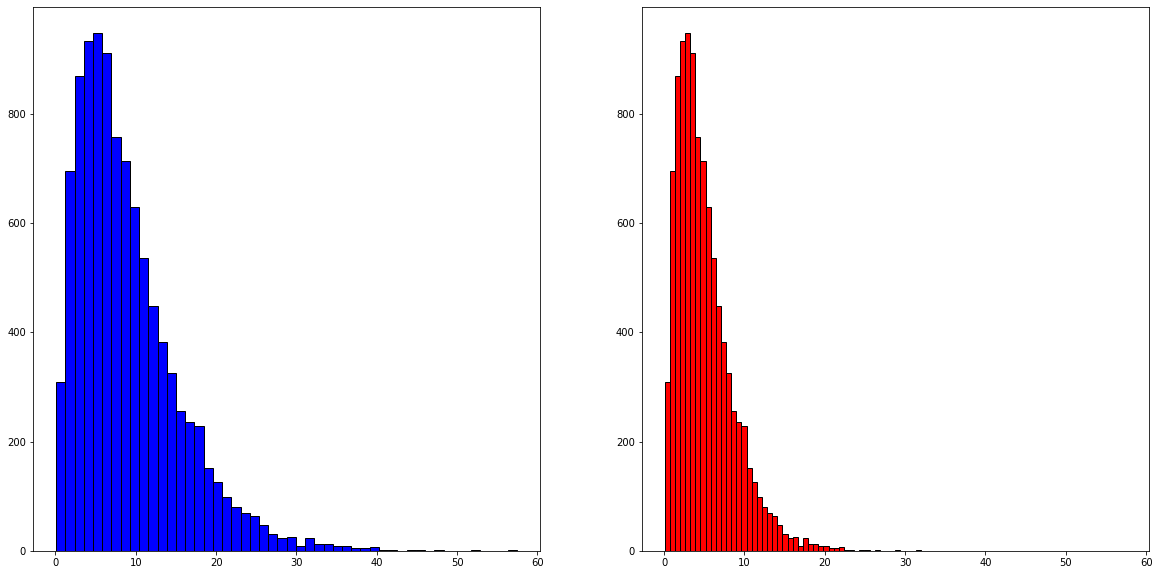

In [3]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sample_var = []

for i in range ( 0,10000):
    x = np.random.normal(loc=10, scale=3.0, size=5) # normal distribution with mean 10 & var = 9 ( std dev = 3)
    avg = np.mean(x)
    sample_var.append((np.sum((x -avg)**2))/4) # Sample variance
sample_var = np.array(sample_var)
chi_sq = 5/9 *sample_var    # ( chi square statistic = n* sample var/population var)
ax1.hist(sample_var,50, color='b', edgecolor='black')
ax2.hist(chi_sq,50, color='r', edgecolor='black')
ax2.set_xlim(ax1.get_xlim())
ax1.set_ylim(ax2.get_ylim())
plt.show()